## 1. Načtení importů a dat

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = "whitegrid")
df = pd.read_csv("../data/cleaned_data.csv", sep = ";")

print(df.shape)
df.head()

(1468134, 7)


,Lokalita,Obytná plocha,Počet místností,Podlaží,Datum prodeje,Místo/čas,Cena za m/2
0,Pardubický kraj,50.0,2 + KK,4,2023.0,Pardubickýkraj_2023,43518.778164
1,Jihomoravský kraj,42.0,2 + KK,3,2023.0,Jihomoravskýkraj_2023,59267.045176
2,Brno-Komín,39.0,2 + KK,11,2023.0,Brno-Komín_2023,136914.528959
3,Brno-jih,53.0,2 + KK,3,2020.0,Brno-jih_2020,76571.786573
4,Liberecký kraj,44.0,3 + KK,4,2023.0,Libereckýkraj_2023,37045.367671


## 2. Histogram ceny za m/2

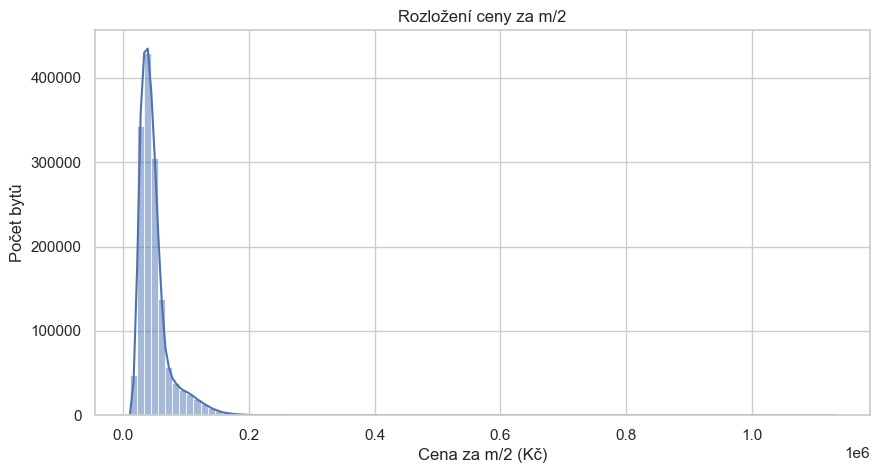

In [2]:
plt.figure(figsize = (10, 5))

sns.histplot(df["Cena za m/2"], bins = 100, kde = True)

plt.title("Rozložení ceny za m/2")
plt.xlabel("Cena za m/2 (Kč)")
plt.ylabel("Počet bytů")

plt.show()

## 3. Závislost ceny na obytné ploše

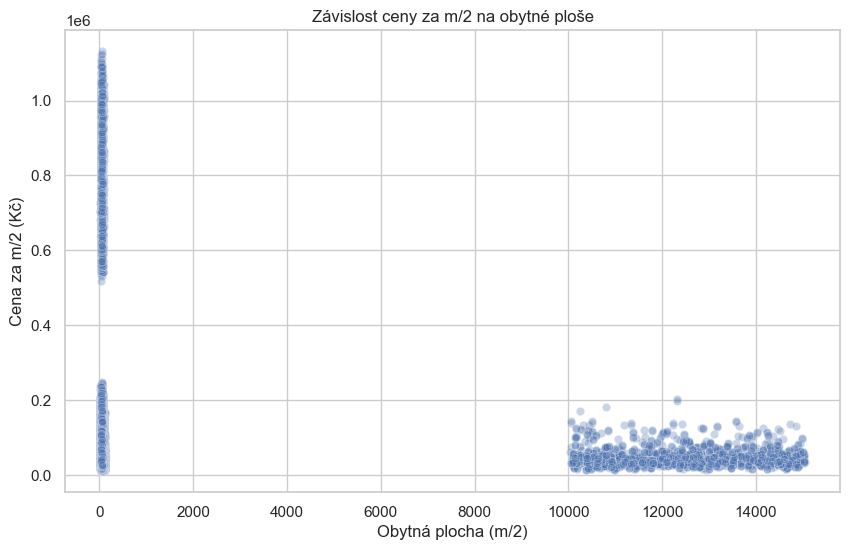

In [3]:
plt.figure(figsize = (10, 6))

sns.scatterplot(data = df, x = "Obytná plocha", y = "Cena za m/2", alpha = 0.3)

plt.title("Závislost ceny za m/2 na obytné ploše")
plt.xlabel("Obytná plocha (m/2)")
plt.ylabel("Cena za m/2 (Kč)")

plt.show()

## 4. Průměrná cena podle krajů

/var/folders/6w/ypf5xy7s5vx9tsd3rg2fr9qh0000gn/T/ipykernel_9889/3640030179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_grouped.values, y = df_grouped.index, palette = "viridis")


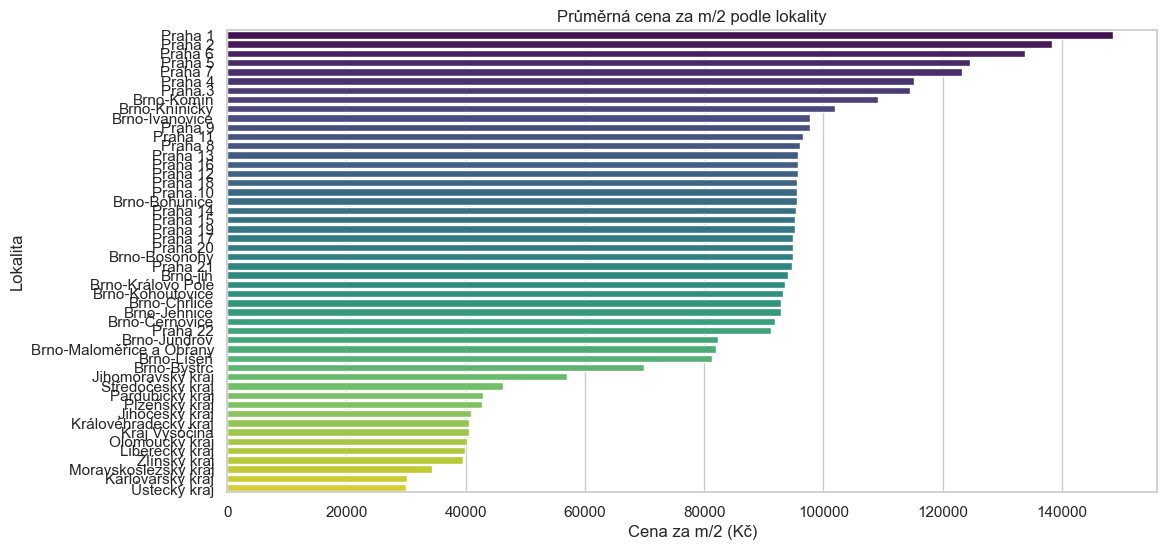

In [4]:
plt.figure(figsize = (12, 6))

df_grouped = df.groupby("Lokalita")["Cena za m/2"].mean().sort_values(ascending = False)

sns.barplot(x = df_grouped.values, y = df_grouped.index, palette = "viridis")

plt.title("Průměrná cena za m/2 podle lokality")
plt.xlabel("Cena za m/2 (Kč)")
plt.ylabel("Lokalita")

plt.show()

## 5. Cena podle dispozice bytu

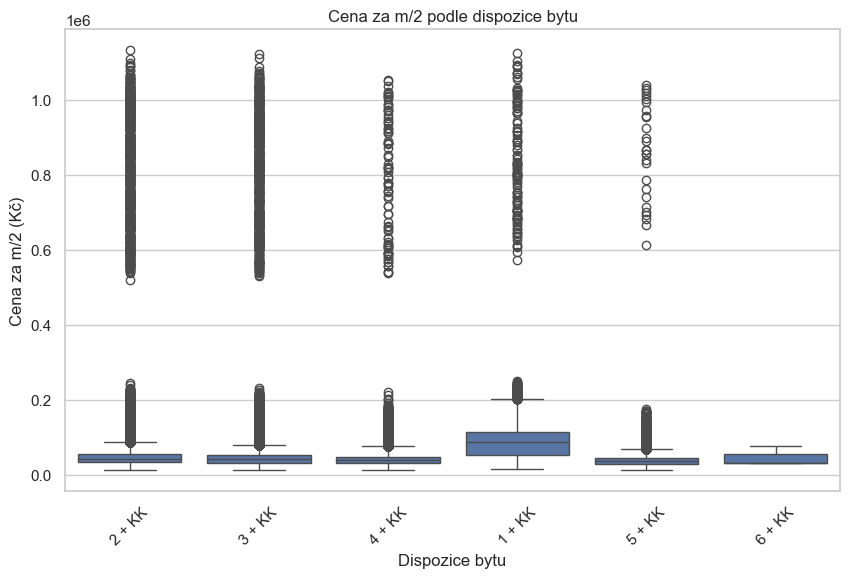

In [5]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = df, x = "Počet místností", y = "Cena za m/2")

plt.title("Cena za m/2 podle dispozice bytu")
plt.xlabel("Dispozice bytu")
plt.ylabel("Cena za m/2 (Kč)")
plt.xticks(rotation = 45)

plt.show()

## 6. Vývoj cen v čase

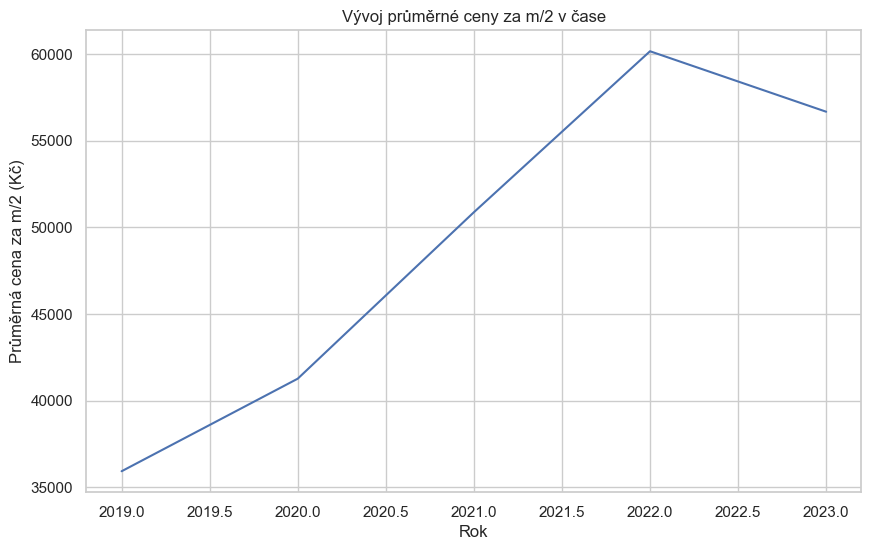

In [6]:
plt.figure(figsize = (10, 6))

sns.lineplot(data = df.groupby("Datum prodeje")["Cena za m/2"].mean())

plt.title("Vývoj průměrné ceny za m/2 v čase")
plt.xlabel("Rok")
plt.ylabel("Průměrná cena za m/2 (Kč)")

plt.show()